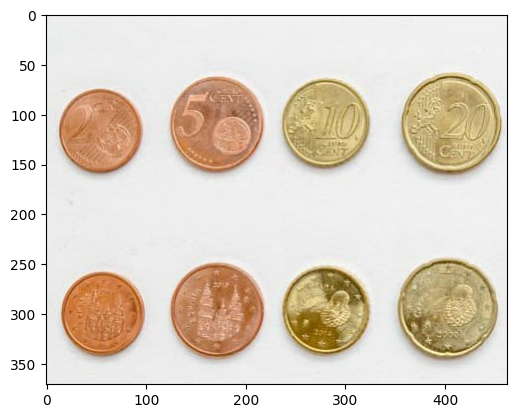

In [157]:
# 2023688021 Oğuz Refik Çukadar

import cv2
import numpy as np
import matplotlib.pyplot as plt

bgr_img = cv2.imread("para.jpg")
rgb_img = cv2.cvtColor(bgr_img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

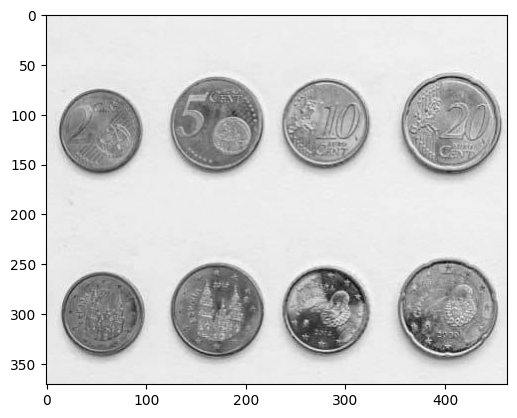

In [158]:
gri_img= cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)
plt.imshow(gri_img, cmap="gray")

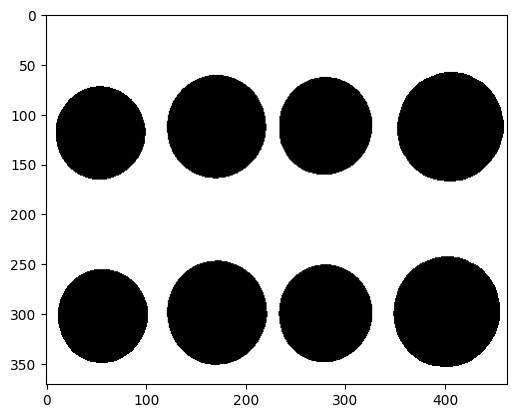

In [159]:
bulanik_img = cv2.GaussianBlur(gri_img, (15, 15), 0)
_, binary_img= cv2.threshold(bulanik_img, 220, 255, cv2.THRESH_BINARY)
plt.imshow(binary_img, cmap="gray")

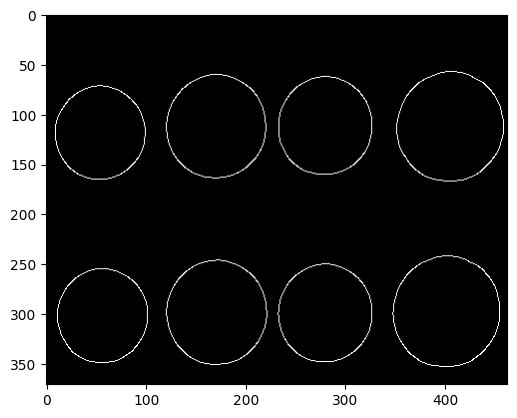

In [160]:
kenar_img = cv2.Canny(binary_img, 50,100)
plt.imshow(kenar_img, cmap="gray")


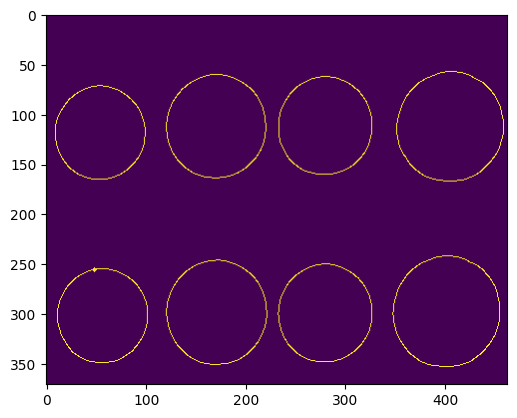

In [161]:
kontorler, _ = cv2.findContours(kenar_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
kontorlu_img = cv2.drawContours(kenar_img, kontorler[0], 1, (255, 0, 0), 3)
plt.imshow(kontorlu_img)
plt.show()



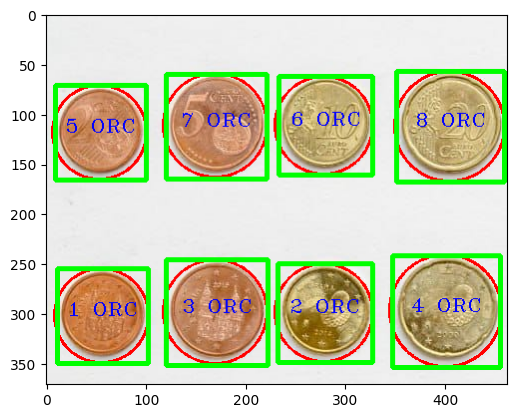

In [162]:
# Kontorleri belirlenen görselde kutular, çemberler ve metinler
# oluşmadığı için ana görselde gösterimlerini yapıyorum.


sirala = sorted(kontorler, key = cv2.contourArea)
kopya_img = rgb_img.copy()

for i, kontor in enumerate(kontorler):

    (x, y), radius = cv2.minEnclosingCircle(kontor)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(kopya_img, center, radius, (255, 0, 0), 2)

    x, y, w, h = cv2.boundingRect(kontor)
    cv2.rectangle(kopya_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
    metin = f"{i+1} ORC"
    cv2.putText(kopya_img, metin, ((x+w//2)-35 , y+h//2), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 1)

plt.imshow(kopya_img)
plt.show()